# VAI CURINTIA!


![Corinthias Logo](https://a.espncdn.com/combiner/i?img=/i/teamlogos/soccer/500/874.png&h=200&w=200 "Vai Curintia")


Essa é uma análise dos dados do campeonato brasileiro sobre o corinthians.



# Preparação dos Dados

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as rc

In [19]:
df = pd.read_csv("datasets/brasileirao/brasileirao.csv")
df.head()

,Horário,Dia,Data,Clube 1,Clube 2,Vencedor,Rodada,Arena,Clube 1 Gols,Clube 2 Gols,Clube 1 Estado,Clube 2 Estado,Estado Clube Vencedor
0,16h00,Sábado,2000-07-29,Fluminense,Bahia,Fluminense,1ª Rodada,Maracanã,2,0,RJ,BA,RJ
1,16h00,Sábado,2000-07-29,Vasco,Sport,Sport,1ª Rodada,São Januário,0,2,RJ,PE,PE
2,16h00,Sábado,2000-07-29,Vitória,Palmeiras,Vitória,1ª Rodada,Barradão,4,1,ES,SP,ES
3,17h00,Domingo,2000-07-30,Botafogo-RJ,Atlético-MG,-,1ª Rodada,Caio Martins,0,0,RJ,MG,Empate
4,18h30,Domingo,2000-07-30,Juventude,Flamengo,-,1ª Rodada,Alfredo Jaconi,1,1,RS,RJ,Empate


Antes de qualquer coisa, vamos ver se os nomes dos clubes estão corretos.

In [20]:
print(df['Clube 1'].unique())

['Fluminense' 'Vasco' 'Vitória' 'Botafogo-RJ' 'Juventude' 'Guarani'
 'Cruzeiro' 'América-MG' 'Goiás' 'Coritiba' 'Bahia' 'Flamengo' 'Gama'
 'Internacional' 'Ponte Preta' 'Santos' 'Palmeiras' 'Athlético-PR'
 'Corinthians' 'Atlético-MG' 'Portuguesa' 'Grêmio' 'São Paulo'
 'Santa Cruz' 'Sport' 'INTERNACIONAL' 'Paraná' 'REMO' 'São Caetano'
 'MALUTROM' 'PALMEIRAS' 'BAHIA' 'CRUZEIRO' 'PONTE PRETA' 'FLUMINENSE'
 'SPORT' 'VASCO' 'Botafogo-SP' 'Figueirense' 'Paysandu' 'SANTOS'
 'CORINTHIANS' 'JUVENTUDE' 'Fortaleza' 'Criciúma' 'Brasiliense'
 'América-RN' 'Náutico' 'Ipatinga' 'Avaí' 'Santo André' 'Barueri'
 'FLAMENGO' 'Atlético-GO' 'Ceará' 'Grêmio Prudente' 'Chapecoense'
 'Joinville' 'Botafogo-rj' 'CSA']


In [21]:
print(df['Clube 2'].unique())

['Bahia' 'Sport' 'Palmeiras' 'Atlético-MG' 'Flamengo' 'Santa Cruz'
 'Athlético-PR' 'Gama' 'Corinthians' 'Grêmio' 'Fluminense' 'Goiás'
 'América-MG' 'Vitória' 'Botafogo-RJ' 'Santos' 'Cruzeiro' 'Ponte Preta'
 'Guarani' 'São Paulo' 'Portuguesa' 'Coritiba' 'Internacional' 'Juventude'
 'Vasco' 'SPORT' 'FLUMINENSE' 'CRUZEIRO' 'PONTE PRETA' 'VASCO'
 'INTERNACIONAL' 'Paraná' 'MALUTROM' 'São Caetano' 'REMO' 'BAHIA'
 'PALMEIRAS' 'Botafogo-SP' 'portuguesa' 'Paysandu' 'Figueirense'
 'JUVENTUDE' 'CORINTHIANS' 'SANTOS' 'Fortaleza' 'Criciúma' 'PAYSANDU'
 'Brasiliense' 'Náutico' 'América-RN' 'Ipatinga' 'Barueri' 'Avaí'
 'Santo André' 'Grêmio Prudente' 'Atlético-GO' 'Ceará' 'GUARANI'
 'Chapecoense' 'Joinville' 'Botafogo-rj' 'CSA']


Dá pra ver que alguns times receberam nomes diferentes.
Vamos corrigir isso.

In [22]:
df = df.replace(['INTERNACIONAL','REMO','MALUTROM','PALMEIRAS','BAHIA','CRUZEIRO','PONTE PRETA',
                 'FLUMINENSE','SPORT','VASCO','SANTOS','CORINTHIANS','JUVENTUDE','FLAMENGO','GUARANI','PAYSANDU','Botafogo-RJ'],
                ['Internacional','Remo','Malutrom','Palmeiras','Bahia','Cruzeiro','Ponte Preta',
                 'Fluminense','Sport','Vasco','Santos','Corinthians','Juventude','Flamengo','Guarani','Paysandu','Botafogo-rj'])

Agora, vamos dar o nome correto do curintia.


In [23]:
df = df.replace(['Corinthians'],['CURINTIA'])

Para facilitar o trabalho, limparei o dataframe e criarei um novo. As colunas novas serão:

* Ano
* Time Mandante
* Time Visitante
* Gols Mandante
* Gols Visitante
* Vencedor

Vamos eliminar todas as partidas antes de 2003 e todas as partidas que o Curintia não disputou. Vamos eliminar as colunas que não serão usados e renomear outras colunas.

In [24]:
# Criar coluna 'Ano'
df['Data'] = pd.to_datetime(df['Data'])
df['Ano'] = df['Data'].dt.year

# Eliminar as partidas antes de 2003
df = df.drop(df[df.Ano < 2003].index)

# Eliminar colunas que não serão usadas
df = df.drop(['Horário', 'Dia','Rodada','Arena','Clube 1 Estado','Clube 2 Estado','Estado Clube Vencedor'], axis = 1)

# Renomear colunas
df = df.rename(columns={"Clube 1":"Mandante","Clube 2":"Visitante","Clube 1 Gols":"Mandante Gols",
                        "Clube 2 Gols":"Visitante Gols"})

# Trocar "-" por "Empate" na coluna 'Vencedor'
df = df.replace('-','Empate')

# Criar outro dataframe
dados = df.copy()

# Eliminar partidas que o CURINTIA não jogou
df = df.drop(df[(df['Mandante'] != 'CURINTIA') & (df['Visitante'] != 'CURINTIA')].index)

# Vamos dar uma olhada no dataframe
df.head()

,Data,Mandante,Visitante,Vencedor,Mandante Gols,Visitante Gols,Ano
1063,2003-03-30,CURINTIA,Atlético-MG,Atlético-MG,0,3,2003
1069,2003-04-06,Figueirense,CURINTIA,Empate,3,3,2003
1079,2003-04-12,CURINTIA,Paysandu,CURINTIA,6,1,2003
1091,2003-04-16,Vasco,CURINTIA,Empate,2,2,2003
1111,2003-04-20,Internacional,CURINTIA,Internacional,2,1,2003


Vamos verificar o número de jogos por ano

In [25]:
jogos = df.groupby('Ano')['Ano'].count()
jogos = pd.DataFrame(jogos)
jogos.columns = ['Jogos']
jogos.reset_index(level=0, inplace=True)
print(jogos)

     Ano  Jogos
0   2003     46
1   2004     46
2   2005     42
3   2006     38
4   2007     38
5   2009     38
6   2010     38
7   2011     38
8   2012     38
9   2013     38
10  2014     38
11  2015     38
12  2016     38
13  2017     38
14  2018     38
15  2019     38


# Gols marcados #

Para facilitar, vou criar dois dataframes. Um com as partidas nas quais o Curintia foi mandante e outro com as partidas nas quais o Curintia foi visitante.

In [26]:
## Partidas como mandante ##
# Criar um dataframe para partidas como mandante
mandante = df.copy()
mandante = mandante.drop(mandante[mandante['Mandante'] != 'CURINTIA'].index)

# Criar um dataframe com nº de jogos por ano
jogos_mandante = mandante.groupby('Ano')['Ano'].count()
jogos_mandante = pd.DataFrame(jogos_mandante)
jogos_mandante.columns = ['Partidas mandante']
jogos_mandante.reset_index(level=0, inplace=True)

# Dataframe com o nº de gols por edição
gols_mandante = mandante.groupby('Ano')['Mandante Gols'].sum()
gols_mandante = pd.DataFrame(gols_mandante)
gols_mandante.columns = ['Mandante Gols']
gols_mandante.reset_index(level=0, inplace=True)

# Dataframe com partidas e gols por edição
gp_mandante = jogos_mandante.merge(gols_mandante, how='left', on='Ano')

# Criar coluna com a média de gols por partida
gp_mandante['GP Mandante'] = round(gp_mandante['Mandante Gols']/gp_mandante['Partidas mandante'],2)

## Partidas como visitante ##
# Criar um dataframe para partidas como visitante
visitante = df.copy()
visitante = visitante.drop(visitante[visitante['Visitante'] != 'CURINTIA'].index)

# Criar um dataframe com nº de jogos por ano
jogos_visitante = visitante.groupby('Ano')['Ano'].count()
jogos_visitante = pd.DataFrame(jogos_visitante)
jogos_visitante.columns = ['Partidas visitante']
jogos_visitante.reset_index(level=0, inplace=True)

# Dataframe com o nº de gols por edição
gols_visitante = visitante.groupby('Ano')['Visitante Gols'].sum()
gols_visitante = pd.DataFrame(gols_visitante)
gols_visitante.columns = ['Visitante Gols']
gols_visitante.reset_index(level=0, inplace=True)

# Dataframe com partidas e gols por edição
gp_visitante = jogos_visitante.merge(gols_visitante, how='left', on='Ano')

# Criar coluna com a média de gols por partida
gp_visitante['GP Visitante'] = round(gp_visitante['Visitante Gols']/gp_visitante['Partidas visitante'],2)

## Todas as Partidas ##
gp_geral = gp_mandante.merge(gp_visitante, how='left', on='Ano')
gp_geral['Partidas'] = gp_geral['Partidas mandante'] + gp_geral['Partidas visitante']
gp_geral['Gols'] = gp_geral['Mandante Gols'] + gp_geral['Visitante Gols']
gp_geral['GP Geral'] = round(gp_geral['Gols']/gp_geral['Partidas'],2)

In [28]:
gp_geral

,Ano,Partidas mandante,Mandante Gols,GP Mandante,Partidas visitante,Visitante Gols,GP Visitante,Partidas,Gols,GP Geral
0,2003,23,36,1.57,23,25,1.09,46,61,1.33
1,2004,23,29,1.26,23,25,1.09,46,54,1.17
2,2005,21,48,2.29,21,39,1.86,42,87,2.07
3,2006,19,22,1.16,19,19,1.00,38,41,1.08
4,2007,19,17,0.89,19,23,1.21,38,40,1.05
5,2009,19,32,1.68,19,18,0.95,38,50,1.32
6,2010,19,41,2.16,19,24,1.26,38,65,1.71
7,2011,19,32,1.68,19,21,1.11,38,53,1.39
8,2012,19,31,1.63,19,20,1.05,38,51,1.34
9,2013,19,17,0.89,19,10,0.53,38,27,0.71


### Gols marcados ao longo do tempo ###

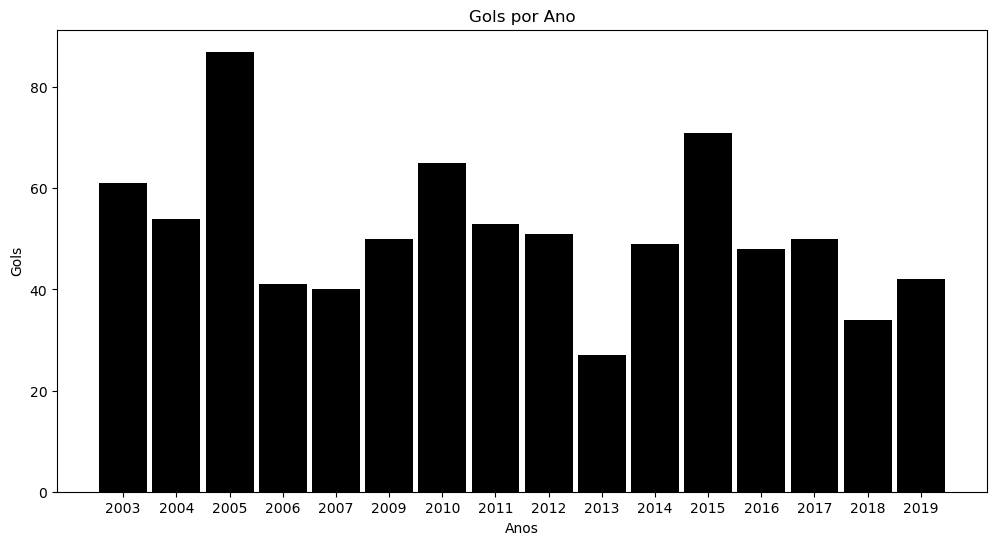

<Figure size 1200x800 with 0 Axes>

In [30]:
r = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

nomes = ('2003','2004','2005','2006','2007','2009','2010','2011','2012','2013','2014','2015','2016',
        '2017','2018','2019')

coluna1 = gp_geral['Gols']

# gráfico
barWidth = 0.9
# Criando a barra de gols marcados
plt.bar(r, coluna1, color='black', width=barWidth)

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Gols")
plt.title("Gols por Ano")

# Tamanho do gráfico
plt.figure(figsize=(12,5))
 
# Visualizar o gráfico
plt.show()

### Gols marcados por partida

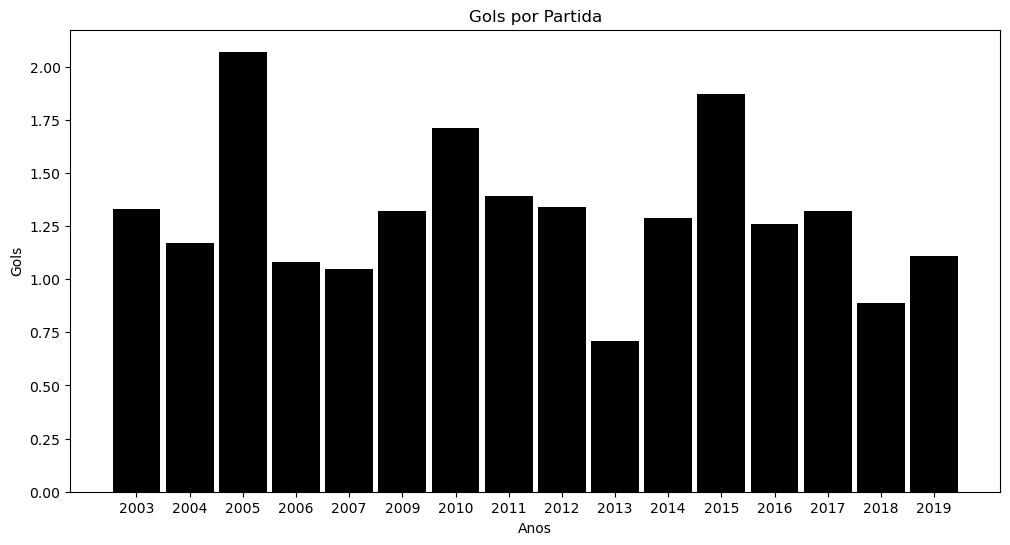

In [32]:
coluna1 = gp_geral['GP Geral']

# gráfico
barWidth = 0.9
# Criando a barra de gols marcados por partida
plt.bar(r, coluna1, color='black', width=barWidth)

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Gols")
plt.title("Gols por Partida")

# Tamanho do gráfico
plt.figure(figsize=(12,5))
 
# Visualizar o gráfico
plt.show()

### Distribuição dos gols em casa e fora de casa

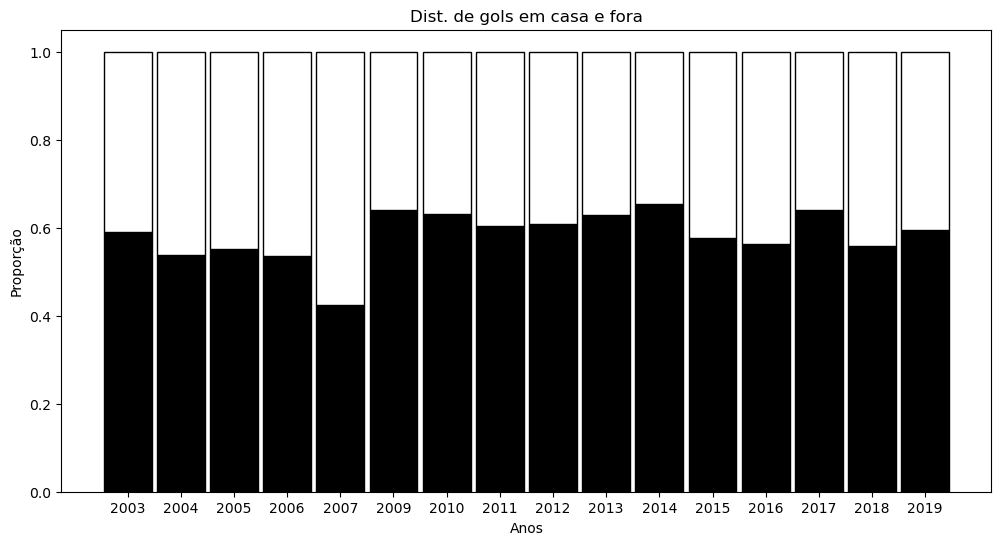

<Figure size 1200x500 with 0 Axes>

In [39]:
coluna1 = gp_geral['Mandante Gols']/gp_geral['Gols']
coluna2 = gp_geral['Visitante Gols']/gp_geral['Gols']

# gráfico
barWidth = 0.9
# Criando a barra de gols em casa
plt.bar(r, coluna1, color='black', edgecolor='black', width=barWidth, label='Gols em Casa')
# Criando a barra de gols fora de casa
plt.bar(r, coluna2, bottom=coluna1, color='white', edgecolor='black', width=barWidth, label='Gols Fora')

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Proporção")
plt.title("Dist. de gols em casa e fora")
 
plt.figure(figsize=(12,5))
    
# Visualizar o gráfico
#plt.legend()
plt.show()

In [41]:
# Gols por jogo
gols = gp_geral['Gols'].sum()
partidas =  gp_geral['Partidas'].sum()
gols_partida = gols/partidas
print("O CURINTIA tem uma média de "+str(round(gols_partida,1))+ " gols por partida")

# Gols por jogo em casa
gols_casa = gp_geral['Mandante Gols'].sum()
partidas_casa =  gp_geral['Partidas mandante'].sum()
gols_partida_casa = gols_casa/partidas_casa
print("Em casa, o CURINTIA tem uma média de "+str(round(gols_partida_casa,1))+ " gols por partida")

# Gols por jogo fora de casa
gols_fora = gp_geral['Visitante Gols'].sum()
partidas_fora =  gp_geral['Partidas visitante'].sum()
gols_partida_fora = gols_fora/partidas_fora
print("Fora de casa, o CURINTIA tem uma média de "+str(round(gols_partida_fora,1))+ " gols por partida")

O CURINTIA tem uma média de 1.3 gols por partida
Em casa, o CURINTIA tem uma média de 1.5 gols por partida
Fora de casa, o CURINTIA tem uma média de 1.1 gols por partida


# Resultados #

Agora, vamos ver como o Curintia se saiu jogando em casa e fora de casa. Aqui, vamos aproveitar os dataframes 'Mandante' e 'Visitante'.

Vamos ver como o Curintia se saiu jogando em casa.

In [42]:
# Contar o número de vitórias
vitorias_casa=mandante.groupby('Ano')['Vencedor'].apply(lambda x: (x=='CURINTIA').sum()).reset_index(name='Vitórias')

# Contar o número de empates
empates_casa=mandante.groupby('Ano')['Vencedor'].apply(lambda x: (x=='Empate').sum()).reset_index(name='Empates')

# Juntar os dataframes
resultado_casa = jogos_mandante.merge(vitorias_casa, how='left', on='Ano')
resultado_casa = resultado_casa.merge(empates_casa, how='left', on='Ano')

# Ajeitar coluna
resultado_casa = resultado_casa.rename(columns={"Partidas mandante":"Jogos"}) 

# Criar coluna de derrotas
resultado_casa['Derrotas']= resultado_casa['Jogos'] - resultado_casa['Vitórias']-resultado_casa['Empates']

## Distribuição dos resultados em casa ##

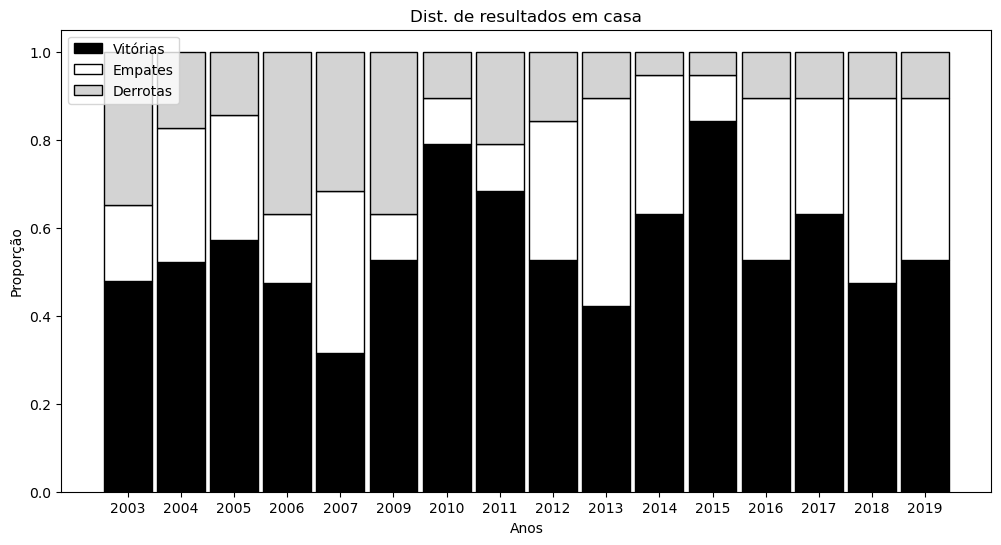

In [47]:
coluna1 = resultado_casa['Vitórias']/resultado_casa['Jogos']
coluna2 = resultado_casa['Empates']/resultado_casa['Jogos']
coluna3 = resultado_casa['Derrotas']/resultado_casa['Jogos']

# gráfico
barWidth = 0.9
# Criando a barra de vitórias
plt.bar(r, coluna1, color='black', edgecolor='black', width=barWidth,label='Vitórias')
# Criando a barra de empates
plt.bar(r, coluna2, bottom=coluna1, color='white', edgecolor='black', width=barWidth,label='Empates')
# Criando a barra de derrotas
plt.bar(r, coluna3, bottom=[i+j for i,j in zip(coluna1, coluna2)], color='lightgray', edgecolor='black',
        width=barWidth,label='Derrotas')

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Proporção")
plt.title("Dist. de resultados em casa")
 
# Visualizar o gráfico
plt.legend()
plt.show()

### Aproveitamento de pontos em casa

In [48]:
resultado_casa['% Aprov.']= round((3*resultado_casa['Vitórias']+resultado_casa['Empates'])/(3*resultado_casa['Jogos']),2)
print(resultado_casa)

     Ano  Jogos  Vitórias  Empates  Derrotas  % Aprov.
0   2003     23        11        4         8      0.54
1   2004     23        12        7         4      0.62
2   2005     21        12        6         3      0.67
3   2006     19         9        3         7      0.53
4   2007     19         6        7         6      0.44
5   2009     19        10        2         7      0.56
6   2010     19        15        2         2      0.82
7   2011     19        13        2         4      0.72
8   2012     19        10        6         3      0.63
9   2013     19         8        9         2      0.58
10  2014     19        12        6         1      0.74
11  2015     19        16        2         1      0.88
12  2016     19        10        7         2      0.65
13  2017     19        12        5         2      0.72
14  2018     19         9        8         2      0.61
15  2019     19        10        7         2      0.65


Jogando como mandante o Curintia teve aproveitamento inferior a 50% apenas em 2007

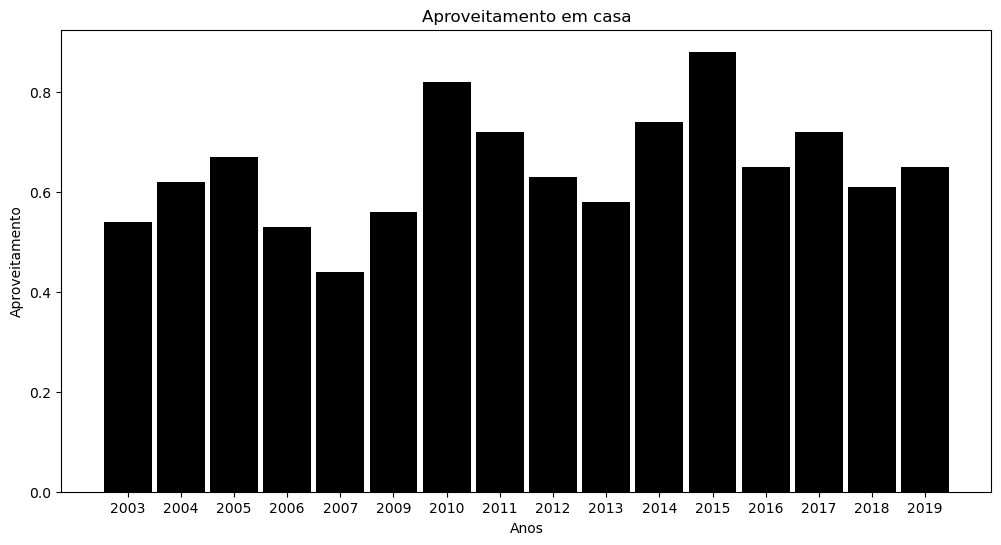

In [49]:
coluna1 = resultado_casa['% Aprov.']

# gráfico
barWidth = 0.9
# Criando a barra de aproveitamento
plt.bar(r, coluna1, color='black', width=barWidth)

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Aproveitamento")
plt.title("Aproveitamento em casa")

plt.rcParams["figure.figsize"] = [12,6]
 
# Visualizar o gráfico
plt.show()

Agora, vamos fazer o mesmo para os jogos como visitante.

In [50]:
# Contar o número de vitórias
vitorias_fora=visitante.groupby('Ano')['Vencedor'].apply(lambda x: (x=='CURINTIA').sum()).reset_index(name='Vitórias')

# Contar o número de empates
empates_fora=visitante.groupby('Ano')['Vencedor'].apply(lambda x: (x=='Empate').sum()).reset_index(name='Empates')

# Juntar os dataframes
resultado_fora = jogos_visitante.merge(vitorias_fora, how='left', on='Ano')
resultado_fora = resultado_fora.merge(empates_fora, how='left', on='Ano') 

# Ajeitar coluna
resultado_fora = resultado_fora.rename(columns={"Partidas visitante":"Jogos"})

# Criar coluna de derrotas
resultado_fora['Derrotas']= resultado_fora['Jogos'] - resultado_fora['Vitórias']-resultado_fora['Empates']

### Distribuição de resultados fora de casa

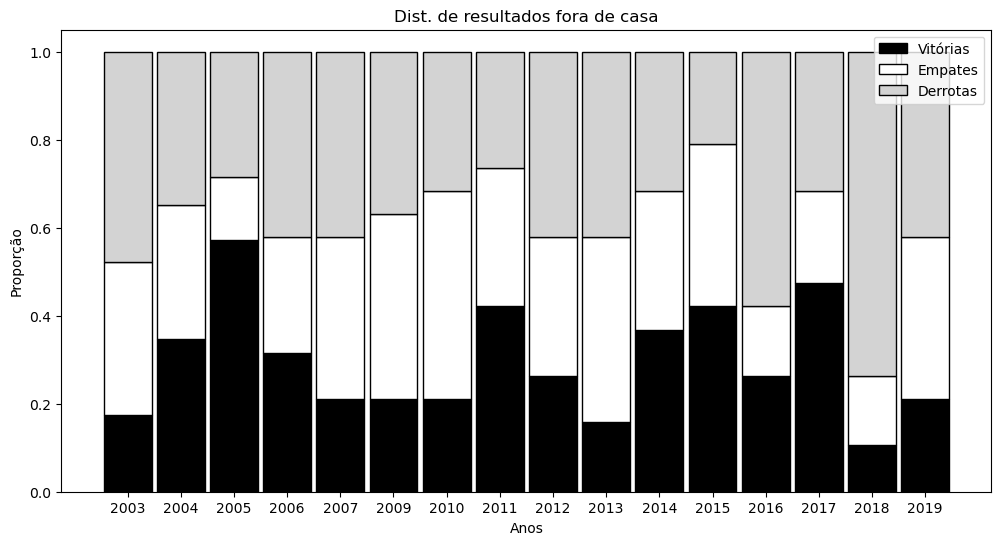

In [52]:
coluna1 = resultado_fora['Vitórias']/resultado_fora['Jogos']
coluna2 = resultado_fora['Empates']/resultado_fora['Jogos']
coluna3 = resultado_fora['Derrotas']/resultado_fora['Jogos']

# gráfico
barWidth = 0.9
# Criando a barra de vitórias
plt.bar(r, coluna1, color='black', edgecolor='black', width=barWidth,label='Vitórias')
# Criando a barra de empates
plt.bar(r, coluna2, bottom=coluna1, color='white', edgecolor='black', width=barWidth,label='Empates')
# Criando a barra de derrotas
plt.bar(r, coluna3, bottom=[i+j for i,j in zip(coluna1, coluna2)], color='lightgray', edgecolor='black',
        width=barWidth,label='Derrotas')

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Proporção")
plt.title("Dist. de resultados fora de casa")
 
# Visualizar o gráfico
plt.legend()
plt.show()

### Aproveitamento de pontos fora de casa

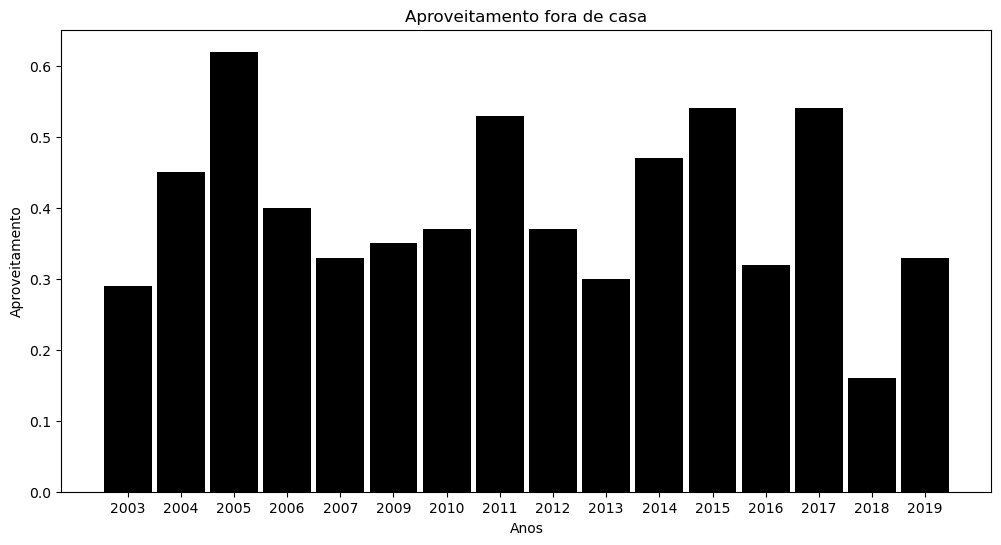

In [53]:
resultado_fora['% Aprov.']= round((3*resultado_fora['Vitórias']+resultado_fora['Empates'])/(3*resultado_fora['Jogos']),2)

coluna1 = resultado_fora['% Aprov.']

# gráfico
barWidth = 0.9
# Criando a barra de aproveitamento
plt.bar(r, coluna1, color='black', width=barWidth)

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Aproveitamento")
plt.title("Aproveitamento fora de casa")

plt.rcParams["figure.figsize"] = [12,6]
 
# Visualizar o gráfico
plt.show()

Agora, vamos juntar os dataframes. Veremos como foi a distribuição de resultados e pontos para cada ano.

Antes, precisamos fazer alguns ajustes. Teremos de alterar o nome das colunas para juntar os dataframes.

In [54]:
# Deletar colunas de aproveitamento
resultado_casa = resultado_casa.drop(['% Aprov.'], axis = 1)
resultado_fora = resultado_fora.drop(['% Aprov.'], axis = 1)

# Deletar coluna repetida
resultado_casa = resultado_casa.drop(['Jogos'], axis = 1)
resultado_fora = resultado_fora.drop(['Jogos'], axis = 1)

# Renomear colunas
resultado_casa = resultado_casa.rename(columns={"Vitórias":"Vit casa","Empates":"Emp casa","Derrotas":"Der casa"})
resultado_fora = resultado_fora.rename(columns={"Vitórias":"Vit fora","Empates":"Emp fora","Derrotas":"Der fora"})

# Juntar dataframes
resultado = jogos.merge(resultado_casa, how='left', on='Ano')
resultado = resultado.merge(resultado_fora, how='left', on='Ano')

# Coluna de Pontos
resultado['Pts'] = 3*(resultado['Vit casa']+resultado['Vit fora'])+resultado['Emp casa']+resultado['Emp fora']

# Coluna com a proporção de pontos conquistados em casa
resultado['% Pts casa']= round((3*resultado['Vit casa']+resultado['Emp casa'])/resultado['Pts'],2)

# Coluna com a proporção de pontos conquistados fora de casa
resultado['% Pts fora']= round((3*resultado['Vit fora']+resultado['Emp fora'])/resultado['Pts'],2)

resultado['Vit'] = resultado['Vit casa'] + resultado['Vit fora']
resultado['Der'] = resultado['Der casa'] + resultado['Der fora']
resultado['Emp'] = resultado['Emp casa'] + resultado['Emp fora']

### Distribuição de resultados

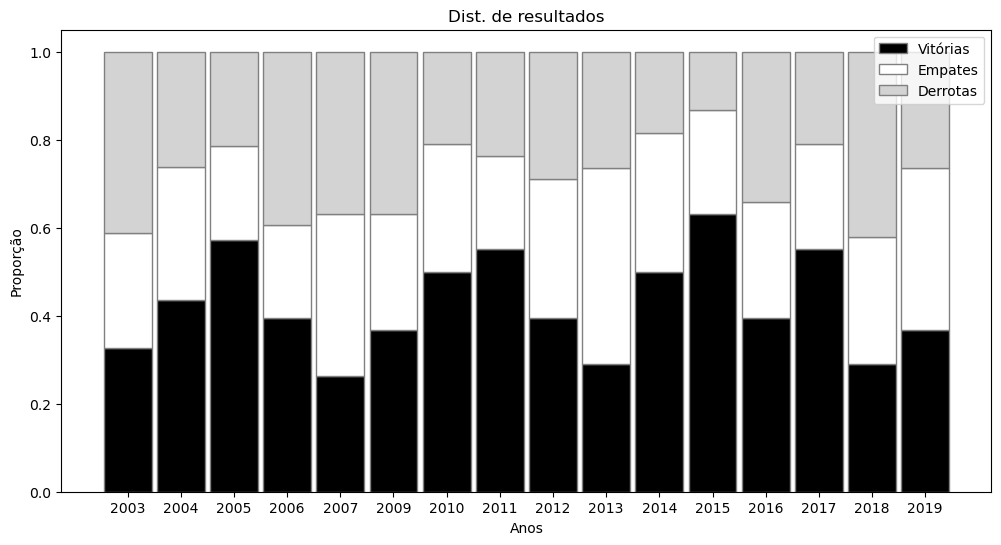

In [65]:
coluna1 = resultado['Vit']/resultado['Jogos']
coluna2 = resultado['Emp']/resultado['Jogos']
coluna3 = resultado['Der']/resultado['Jogos']

# gráfico
barWidth = 0.9
# Criando a barra de vitórias
plt.bar(r, coluna1, color='black', edgecolor='gray', width=barWidth,label='Vitórias')
# Criando a barra de empates
plt.bar(r, coluna2, bottom=coluna1, color='white', edgecolor='gray', width=barWidth,label='Empates')
# Criando a barra de derrotas
plt.bar(r, coluna3, bottom=[i+j for i,j in zip(coluna1, coluna2)], color='lightgray', edgecolor='gray',
        width=barWidth,label='Derrotas')

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Proporção")
plt.title("Dist. de resultados")
 
# Visualizar o gráfico
plt.legend()
plt.show()

Em 2007 e 2018 foi uma porcaria

### Aproveitamento de Pontos

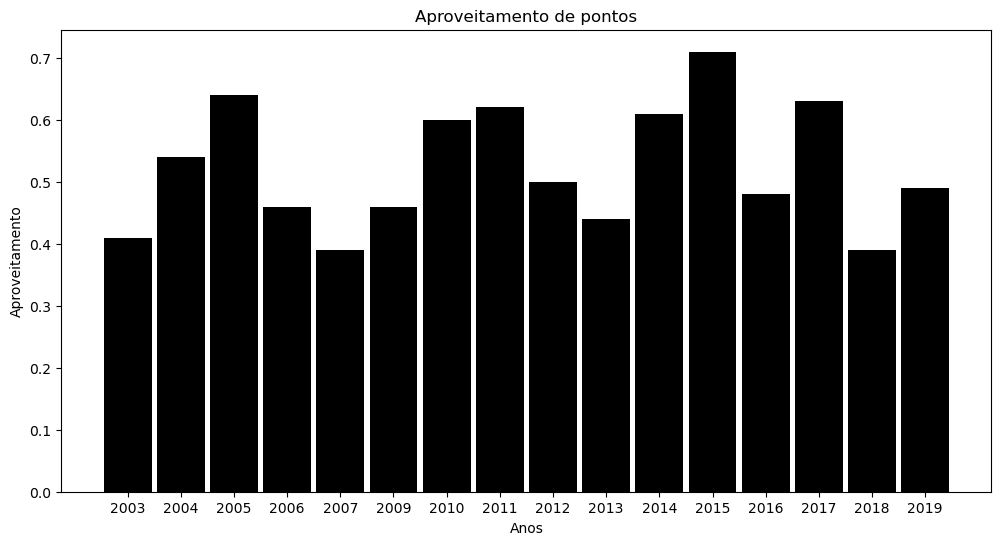

In [58]:
resultado['% Aprov.']= round((3*resultado['Vit']+resultado['Emp'])/(3*resultado['Jogos']),2)

coluna1 = resultado['% Aprov.']

# gráfico
barWidth = 0.9
# Criando a barra de aproveitamento
plt.bar(r, coluna1, color='black', width=barWidth)

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Aproveitamento")
plt.title("Aproveitamento de pontos")

plt.rcParams["figure.figsize"] = [12,6]
 
# Visualizar o gráfico
plt.show()

### Evolução de pontos conquistados ##

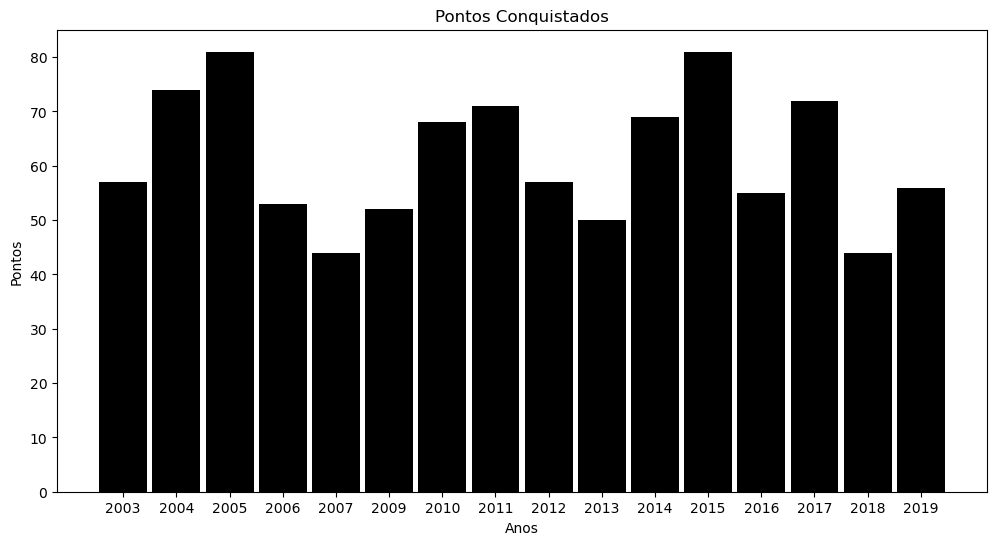

In [61]:
coluna1 = resultado['Pts']

# gráfico
barWidth = 0.9
# Criando a barra de pontos conquistados
plt.bar(r, coluna1, color='black', width=barWidth)

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Pontos")
plt.title("Pontos Conquistados")

plt.rcParams["figure.figsize"] = [12,6]
 
# Visualizar o gráfico
plt.show()

### Distribuição de pontos conquistados em casa e fora de casa

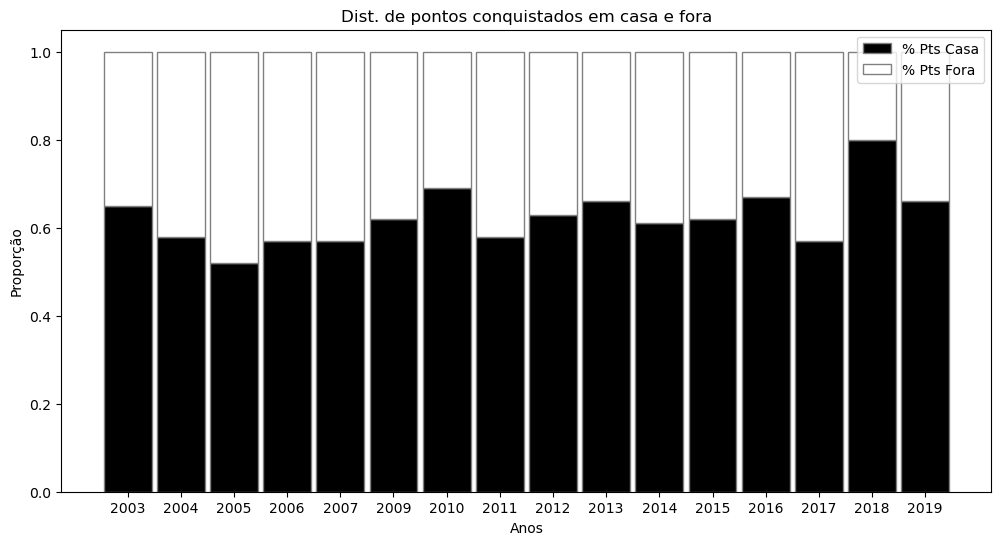

In [63]:
coluna1 = resultado['% Pts casa']
coluna2 = resultado['% Pts fora']

# gráfico
barWidth = 0.9
# Criando a barra de pontos conquistados em casa
plt.bar(r, coluna1, color='black', edgecolor='gray', width=barWidth,label='% Pts Casa')
# Criando a barra de pontos conquistados fora de casa
plt.bar(r, coluna2, bottom=coluna1, color='white', edgecolor='gray', width=barWidth,label='% Pts Fora')

# Eixo X
plt.xticks(r, nomes)
plt.xlabel("Anos")
plt.ylabel("Proporção")
plt.title("Dist. de pontos conquistados em casa e fora")
 
plt.rcParams["figure.figsize"] = [12,6]
    
# Visualizar o gráfico
plt.legend()
plt.show()

O Curintia sempre conquistou mais pontos em casa. 

# Adversário #

Nessa parte, veremos:

* Quais times mais venceram o Curintia
* Quais times mais marcaram gols no Curintia
* Quais times mais perderam para o Curintia
* Quais times mais levaram gols do Curintia

### Times que mais venceram o Curintia

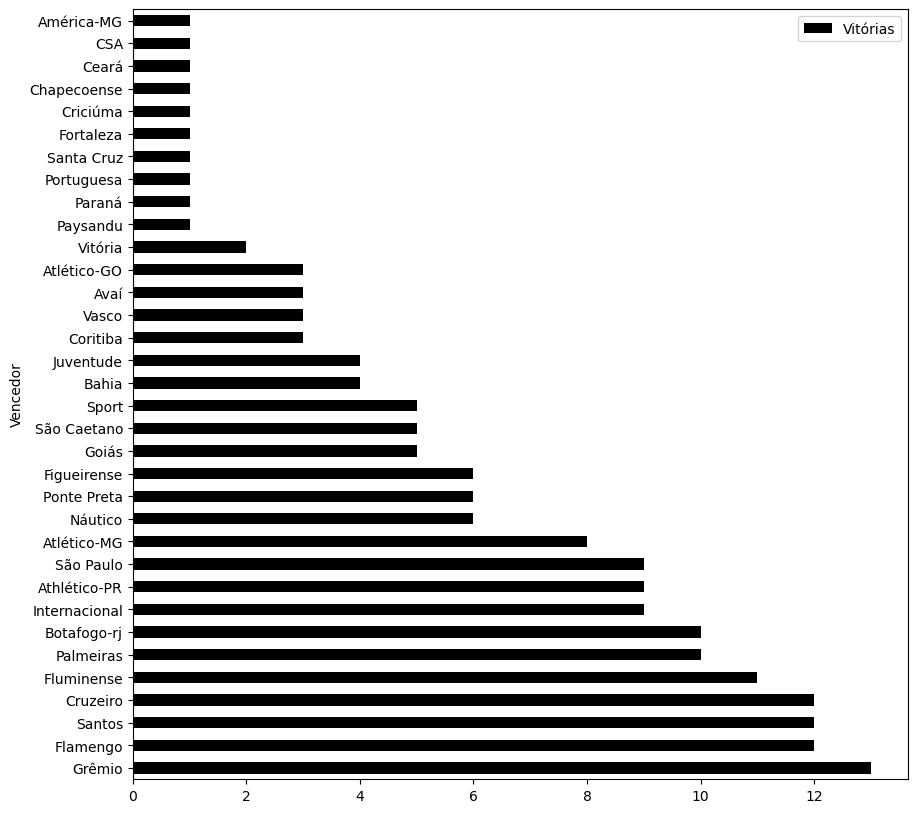

In [66]:
# Somar as vitórias por adversário
adversarios_vit = df.groupby('Vencedor')['Vencedor'].count()
adversarios_vit = pd.DataFrame(adversarios_vit)
adversarios_vit.columns = ['Vitórias']
adversarios_vit.reset_index(level=0, inplace=True)

# Eliminar as linhas com as vitórias do CURINTIA e Empates
adversarios_vit = adversarios_vit.drop(adversarios_vit[(adversarios_vit['Vencedor'] == 'CURINTIA')].index)
adversarios_vit = adversarios_vit.drop(adversarios_vit[(adversarios_vit['Vencedor'] == 'Empate')].index)

# Ordenar o Dataframe em ordem decrescente
adversarios_vit.sort_values(by=['Vitórias'], inplace=True, ascending=False)

# Criar gráfico
ax = adversarios_vit.plot.barh(x='Vencedor', y='Vitórias',color ='black',figsize=(10,10))

### Times que mais fizeram gols no Curintia

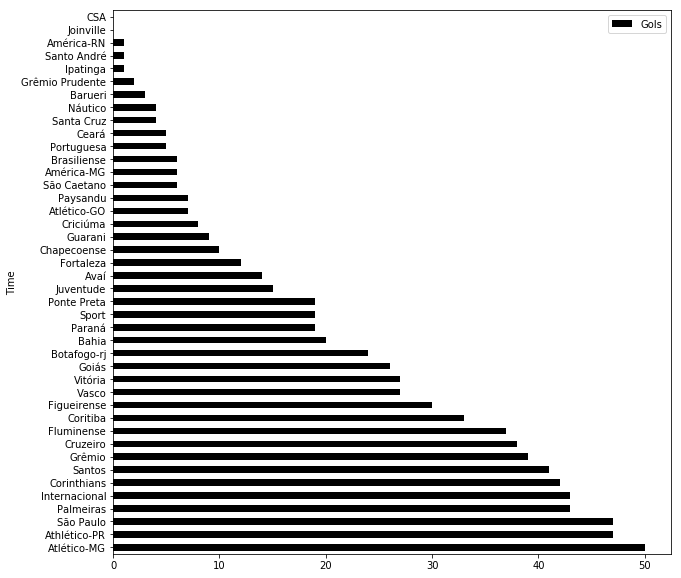

In [26]:
# Pelo dataframe 'Mandante'
gols_adversarios_casa = mandante.groupby('Visitante')['Visitante Gols'].sum()
gols_adversarios_casa = pd.DataFrame(gols_adversarios_casa)
gols_adversarios_casa.columns = ['Gols Casa']
gols_adversarios_casa.reset_index(level=0, inplace=True)
gols_adversarios_casa.columns = ['Time','Gols Casa']

# Pelo dataframe 'Visitante'
gols_adversarios_fora = visitante.groupby('Mandante')['Mandante Gols'].sum()
gols_adversarios_fora = pd.DataFrame(gols_adversarios_fora)
gols_adversarios_fora.columns = ['Gols Fora']
gols_adversarios_fora.reset_index(level=0, inplace=True)
gols_adversarios_fora.columns = ['Time','Gols Fora']

# Juntando os dataframes
gols_adversarios = gols_adversarios_casa.merge(gols_adversarios_fora, how='left', on='Time')

# Criar coluna total com os gols marcados por adversarios
gols_adversarios['Gols'] = gols_adversarios['Gols Casa'] + gols_adversarios['Gols Fora']

# Ordenar o dataframe
gols_adversarios.sort_values(by=['Gols'], inplace=True, ascending=False)

# Criar gráfico
ax = gols_adversarios.plot.barh(x='Time', y='Gols',color ='black',figsize=(10,10))

### Times que mais perderam para o Curintia

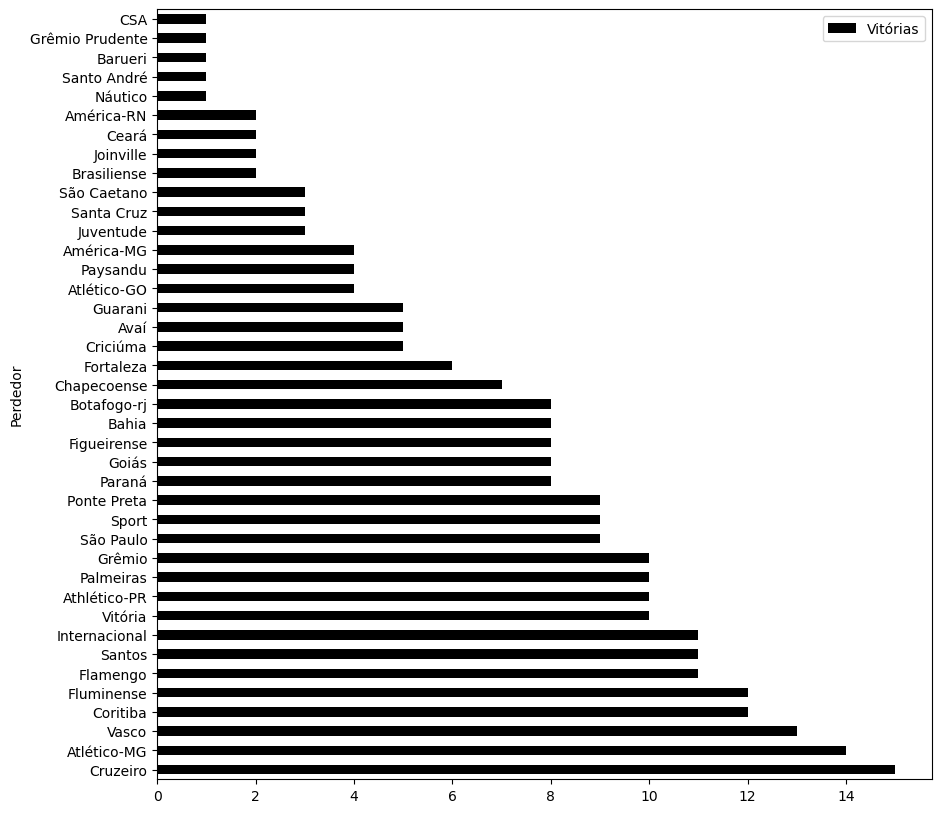

In [68]:
# Criar um dataframe com a coluna de perdedores
perdedores = df.copy()

# Criar a coluna de perdedores
condicoes = [(perdedores['Mandante'] == perdedores['Vencedor']),(perdedores['Visitante'] == perdedores['Vencedor'])]
valores = [perdedores['Visitante'], perdedores['Mandante']]
perdedores['Perdedor'] = np.select(condicoes, valores, default='Empate')

# Contar o número de vitórias do CURINTIA sobre cada adversário
CURINTIA_vit = perdedores.groupby('Perdedor')['Perdedor'].count()
CURINTIA_vit = pd.DataFrame(CURINTIA_vit)
CURINTIA_vit.columns = ['Vitórias']
CURINTIA_vit.reset_index(level=0, inplace=True)

# Eliminar as linhas com as vitórias do CURINTIA e Empates
CURINTIA_vit = CURINTIA_vit.drop(CURINTIA_vit[(CURINTIA_vit['Perdedor'] == 'CURINTIA')].index)
CURINTIA_vit = CURINTIA_vit.drop(CURINTIA_vit[(CURINTIA_vit['Perdedor'] == 'Empate')].index)

# Ordenar o Dataframe em ordem decrescente
CURINTIA_vit.sort_values(by=['Vitórias'], inplace=True, ascending=False)

# Criar gráfico
ax = CURINTIA_vit.plot.barh(x='Perdedor', y='Vitórias',color ='black',figsize=(10,10))

### Times que mais levaram gols do Curintia

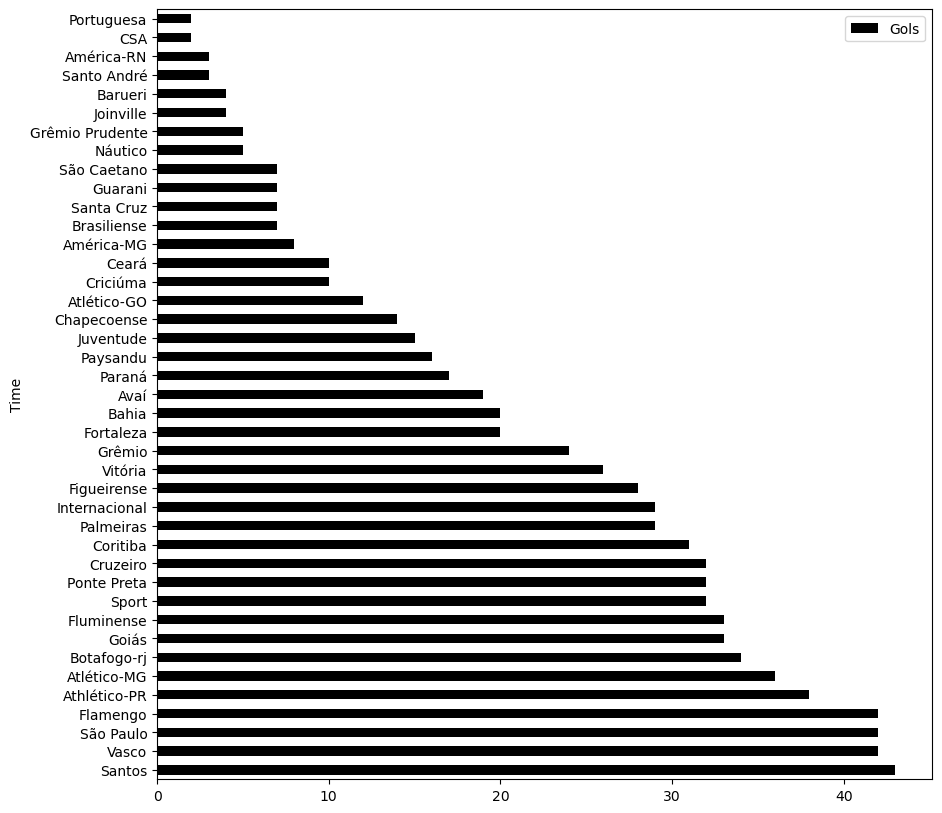

In [70]:
# Pelo dataframe 'Mandante'
gols_CURINTIA_casa = mandante.groupby('Visitante')['Mandante Gols'].sum()
gols_CURINTIA_casa = pd.DataFrame(gols_CURINTIA_casa)
gols_CURINTIA_casa.columns = ['Gols CURINTIA Casa']
gols_CURINTIA_casa.reset_index(level=0, inplace=True)
gols_CURINTIA_casa.columns = ['Time','Gols CURINTIA Casa']

# Pelo dataframe 'Visitante'
gols_CURINTIA_fora = visitante.groupby('Mandante')['Visitante Gols'].sum()
gols_CURINTIA_fora = pd.DataFrame(gols_CURINTIA_fora)
gols_CURINTIA_fora.columns = ['Gols CURINTIA Fora']
gols_CURINTIA_fora.reset_index(level=0, inplace=True)
gols_CURINTIA_fora.columns = ['Time','Gols CURINTIA Fora']

# Juntando os dataframes
gols_CURINTIA = gols_CURINTIA_casa.merge(gols_CURINTIA_fora, how='left', on='Time')

# Criar coluna total com os gols marcados por adversarios
gols_CURINTIA['Gols'] = gols_CURINTIA['Gols CURINTIA Casa'] + gols_CURINTIA['Gols CURINTIA Fora']

# Ordenar o dataframe
gols_CURINTIA.sort_values(by=['Gols'], inplace=True, ascending=False)

# Criar gráfico
ax = gols_CURINTIA.plot.barh(x='Time', y='Gols',color ='black',figsize=(10,10))

# Evolução da classificação

In [72]:
# Função que cria lista dos dataframes de cada ano
def listar_df(dataframe):
    new_df = dataframe.copy()  # Copia o dataframe input
    anos = new_df['Ano'].unique() # Vai criar uma array com cada ano que aparece na coluna
    anos = anos.tolist()    # Transforma a array em uma lista
    
    # Filtrar dataframes
    dbs = []
    for ano in anos:  # Vai pegar os anos na lista e usar como critério para filtrar os dataframes
        db = new_df.loc[new_df['Ano'] == ano]
        dbs.append(db)
       
    return dbs

def conseguir_times(dataframe):
    # Registrar times
    df = dataframe.copy()
    times = df['Mandante'].unique()
    times = times.tolist()
    return times
    
# Função que conta o número de vitórias
def contar_vitórias(dataframe,lista):
    vitorias_time = []
    for item in lista:
        filter = dataframe["Vencedor"] == item
        vitorias = dataframe[filter]['Vencedor'].count().astype(np.int64)
        vitorias_time += [vitorias,]                                                        
    return vitorias_time

# Função que conta o número de empates
def contar_empates(dataframe, lista ):
    empates_time = []
    for item in lista:
        df = dataframe.copy()
        filter1 = (df["Mandante"] == item) | (df["Visitante"] == item)
        filter2 = df["Vencedor"] == 'Empate'
        df = df[(filter1) & (filter2)]
        empates = df['Vencedor'].count().astype(np.int64)
        empates_time += [empates,] 
    return empates_time

# Função que conta o número de derrotas
def contar_derrotas(dataframe, lista):
    derrotas_time = []
    for item in lista:
        df = dataframe.copy()
        filter1 = (df["Mandante"] == item) | (df["Visitante"] == item)
        filter2 = (df["Vencedor"] != item) & (df["Vencedor"] != 'Empate')
        df = df[(filter1) & (filter2)]
        derrotas = df['Vencedor'].count().astype(np.int64)
        derrotas_time += [derrotas,] 
    return derrotas_time

# Função para contar gols
def contar_gp(dataframe, lista):
    gp_time = [] # Gols marcados
    for item in lista:
        df = dataframe.copy()
        # Somar gols marcados em casa
        filter1 = (df["Mandante"] == item)
        df1 = df[(filter1)]
        gp1 = df1['Mandante Gols'].sum().astype(np.int64)
        # Somar gols marcados fora
        filter2 = (df["Visitante"] == item)
        df2 = df[(filter2)]
        gp2 = df2['Visitante Gols'].sum().astype(np.int64)
        gp = gp1 + gp2
        # Somar gols
        gp_time += [gp,]

    return gp_time

def contar_gc(dataframe, lista):
    gc_time = [] # Gols sofridos
    for item in lista:
        df = dataframe.copy()
        # Somar gols sofridos em casa
        filter3 = (df["Mandante"] == item)
        df3 = df[(filter3)]
        gc1 = df3['Visitante Gols'].sum().astype(np.int64)
        # Somar gols sofridos fora
        filter4 = (df["Visitante"] == item)
        df4 = df[(filter4)]
        gc2 = df4['Mandante Gols'].sum().astype(np.int64)
        gc = gc1 + gc2
        # Somar gols
        gc_time += [gc,]
        
    return gc_time

# Criar lista com nossos dataframes
dataframes = listar_df(dados)

# Loop final
tabelas = []
for dataframe in dataframes:
    times = conseguir_times(dataframe)
    vitorias = contar_vitórias(dataframe,times)
    empates = contar_empates(dataframe,times)
    derrotas = contar_derrotas(dataframe,times)
    gp = contar_gp(dataframe,times)
    gc = contar_gc(dataframe,times)
    
    # Transformar listas em um dataframe
    tabela = pd.DataFrame(list(zip(times,vitorias,empates,derrotas,gp,gc)), 
               columns =['times','vitorias','empates','derrotas','GP','GC']) 
    #Criar coluna de pontos e de saldo de gol
    tabela['Pts'] = 3*tabela['vitorias'] + tabela['empates']
    tabela['SG'] = tabela['GP'] + tabela['GC']
    # Ordenar os times
    tabela = tabela.sort_values(['Pts', 'vitorias', 'SG','GP'], ascending=[False, False, False,False])
    # Criar coluna com posição
    posição = len(tabela) + 1
    tabela['Posição'] = [i for i in range(1,posição)]
    # Ajustar ordem das colunas
    tabela = tabela[['times','Pts','vitorias','empates','derrotas','GP','GC','SG','Posição']]
    
    tabelas.append(tabela)
    
# Obter a classificação do CURINTIA ao longo dos anos
fla = []
for tabela in tabelas:
    for index,row in tabela.iterrows():
        if row['times'] == 'CURINTIA':
            pos = row['Posição']
    fla.append(pos)

def conseguir_ano(dataframe):
    new_df = dataframe.copy()  # Copia o dataframe input
    anos = new_df['Ano'].unique() # Vai criar uma array com cada ano que aparece na coluna
    anos = anos.tolist()    # Transforma a array em uma lista
    return anos

ano = conseguir_ano(df)

campeões = pd.DataFrame(list(zip(ano,fla)),columns =['Ano','Classificação'])

campeões.head(17)

,Ano,Classificação
0,2003,16
1,2004,6
2,2005,1
3,2006,9
4,2007,17
5,2009,17
6,2010,10
7,2011,3
8,2012,1
9,2013,6


# Conclusão

In [73]:
# Vitórias
vitorias = resultado['Vit'].sum()
print('O CURINTIA venceu '+str(vitorias) + ' jogos.')

# Derrotas
derrotas = resultado['Der'].sum()
print('O CURINTIA perdeu '+str(derrotas) + ' jogos.')

# Empates
empates = resultado['Emp'].sum()
print('O CURINTIA empatou '+str(empates) + ' jogos.')

# Gols Marcados
print('O CURINTIA marcou '+str(gols) + ' gols.')

# Gols por partida
print('O CURINTIA marcou '+str(round(gols_partida,1)) + ' gols por partida.')

# Aproveitamento de pontos
pontos = 3*vitorias+empates
aproveitamento = pontos/(3*(vitorias+derrotas+empates))
print('O CURINTIA teve aproveitamento de '+str(100*round(aproveitamento,1)) + '%.')

O CURINTIA venceu 268 jogos.
O CURINTIA perdeu 180 jogos.
O CURINTIA empatou 180 jogos.
O CURINTIA marcou 823 gols.
O CURINTIA marcou 1.3 gols por partida.
O CURINTIA teve aproveitamento de 50.0%.
